In [1]:
!pip install pandas
!pip install altair
!pip install requests
!pip install urllib

ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [2]:
import pandas as pd
import altair as alt
import requests
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
SHEET_URLS = {
    "simulado_id_9anoJundiai_e_Sul1": "https://docs.google.com/spreadsheets/d/1WdYDSdSnoZYGrqOZQ6et0ATZ6I_cn68sy40TDvU-7us/edit",
    "saresp_jundiai": "https://docs.google.com/spreadsheets/d/1rVWqlFSdWczK0SYZ4ecSdloJJ4BNllgy7m0K5q9G31Q/edit",
    "saresp_sul1_5_e_9ano": "https://docs.google.com/spreadsheets/d/1mMU5WVwGLQhSf_AwKBXJVaSyMOsqplZqaUeBLAQf-iM/edit",
    "simulado_sul1": "https://docs.google.com/spreadsheets/d/1iuHE5IHQUVaIuo2Z5x5wqJGT2VRJostnVrH40mvHfL4/edit?usp=drive_link",
    "simulado_sul2": "https://docs.google.com/spreadsheets/d/1A0L4YwrVFt77Up049RSdZ9Toe9FD-oXkjERkdppFy0g/edit?usp=drive_link",
    "raca_DEParceiras": "https://docs.google.com/spreadsheets/d/1tyeyM4xhf0KVXthCsSUGF3Wlc9cv4B1EBq7hHUJYV10/edit?usp=drive_link"
}

def carregar_sheet(id_planilha):
    url_csv = f"https://docs.google.com/spreadsheets/d/{id_planilha}/export?format=csv"
    return pd.read_csv(url_csv)

In [4]:
# ID da planilha do simulado (sem /edit no final!)
simulado_id_9anoJundiai_e_Sul1 = "1WdYDSdSnoZYGrqOZQ6et0ATZ6I_cn68sy40TDvU-7us"
saresp_jundiai = "1rVWqlFSdWczK0SYZ4ecSdloJJ4BNllgy7m0K5q9G31Q"
saresp_sul1_5_e_9ano = "1mMU5WVwGLQhSf_AwKBXJVaSyMOsqplZqaUeBLAQf-iM"
simulado_id_5anoSul1 ="1iuHE5IHQUVaIuo2Z5x5wqJGT2VRJostnVrH40mvHfL4"
simulado_id_5anoSul2 = "1A0L4YwrVFt77Up049RSdZ9Toe9FD-oXkjERkdppFy0g"
raca_DEParceiras = "1tyeyM4xhf0KVXthCsSUGF3Wlc9cv4B1EBq7hHUJYV10"

In [5]:
# Carregar
df_simulado_id_9anoJundiai_e_Sul1 = carregar_sheet(simulado_id_9anoJundiai_e_Sul1)
df_saresp_jundiai = carregar_sheet(saresp_jundiai)
df_saresp_sul1_5_e_9ano = carregar_sheet(saresp_sul1_5_e_9ano)
df_simulado_5anoSul1 = carregar_sheet(simulado_id_5anoSul1)
df_simulado_5anoSul2 = carregar_sheet(simulado_id_5anoSul2)
df_raca_DEParceiras = carregar_sheet(raca_DEParceiras)

In [72]:
# Limpeza e filtro SIMULADO

# Filtrar Sul 1
df_sul1 = df_simulado_id_9anoJundiai_e_Sul1[df_simulado_id_9anoJundiai_e_Sul1['DE'].str.contains("SUL 1", case=False)]
df_jundiai = df_simulado_id_9anoJundiai_e_Sul1[df_simulado_id_9anoJundiai_e_Sul1['DE'].str.contains("JUNDIAÍ", case=False)]

# Calcular acertos
df_sul1['Acerto'] = df_sul1['Resposta'].apply(lambda x: 1 if x == 'Correto' else 0)
total_acertos_sul1 = df_sul1.groupby(['DE', 'SERIE_ANO', 'ESCOLA', 'Disciplina'])['Acerto'].sum().reset_index(name='Total_Acertos')
total_questoes_sul1 = df_sul1.groupby(['DE', 'SERIE_ANO', 'ESCOLA', 'Disciplina'])['Resposta'].count().reset_index(name='Total_Respostas')

df_jundiai['Acerto'] = df_jundiai['Resposta'].apply(lambda x: 1 if x == 'Correto' else 0)
total_acertos_jundiai = df_jundiai.groupby(['DE', 'SERIE_ANO', 'ESCOLA', 'Disciplina'])['Acerto'].sum().reset_index(name='Total_Acertos')
total_questoes_jundiai = df_jundiai.groupby(['DE', 'SERIE_ANO', 'ESCOLA', 'Disciplina'])['Resposta'].count().reset_index(name='Total_Respostas')

# Juntar para SUL 1
df_sul1_completo = pd.merge(
    total_questoes_sul1,
    total_acertos_sul1,
    on=['DE', 'SERIE_ANO', 'ESCOLA', 'Disciplina']
)

# Juntar para JUNDIAI
df_jundiai_completo = pd.merge(
    total_questoes_jundiai,
    total_acertos_jundiai,
    on=['DE', 'SERIE_ANO', 'ESCOLA', 'Disciplina']
)

# Combinar tudo em um único DataFrame
df_final_simulado = pd.concat([df_sul1_completo, df_jundiai_completo], ignore_index=True)

df_final_simulado['Taxa_Acerto'] = (df_final_simulado['Total_Acertos'] / df_final_simulado['Total_Respostas']) * 100


# Limpeza e filtro SARESP

df_combined = pd.concat([df_saresp_sul1_5_e_9ano, df_saresp_jundiai], ignore_index=True)

df_final_saresp = df_combined[['DE', 'SERIE_ANO', 'ESCOLA', 'LP', 'MAT', 'MODALIDADE']]

# 4. Aplicar os mesmos passos de filtro e organização do código anterior

#Limpeza base de Raca

df_raca_DEParceiras = df.copy()
colunas_raca = ['Branca', 'Preta', 'Parda', 'Indígena', 'Amarela', 'Não declarada']

df_raca_DEParceiras[colunas_raca] = df_raca_DEParceiras[colunas_raca].fillna(0).astype(int)

# Somar diretamente as colunas 'Preta' e 'Parda' para obter o total de pessoas negras
df_raca_DEParceiras['Pretos_e_Pardos'] = df_raca_DEParceiras['Preta'] + df_raca_DEParceiras['Parda']

df_raca_DEParceiras['Média_Branca'] = (df_raca_DEParceiras['Branca'] / df_raca_DEParceiras['Total']) * 100
df_raca_DEParceiras['Média_Pretos_e_Pardos'] = (df_raca_DEParceiras['Pretos_e_Pardos'] / df_raca_DEParceiras['Total']) * 100

df_raca_Sul1eJundiai = df_raca_DEParceiras[df_raca_DEParceiras['DE'].isin(['SUL 1', 'JUNDIAI'])]

<ipython-input-72-3215e27129d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sul1['Acerto'] = df_sul1['Resposta'].apply(lambda x: 1 if x == 'Correto' else 0)


In [71]:


# Configurações para evitar quebra de linha e truncamento
pd.set_option('display.max_columns', None)      # Mostrar todas as colunas
pd.set_option('display.width', None)            # Ajustar largura automática
pd.set_option('display.max_colwidth', None)     # Mostrar todo o conteúdo das células
pd.set_option('display.expand_frame_repr', False)  # Evitar quebra de linha no DataFrame

# Lista de tabelas e seus nomes (em ordem correspondente)
nomes_tabelas = [
    "Saresp",

]

tabelas = [
    df_raca_Sul1eJundiai


]

# Exibe cada tabela com seu nome, sem índice e sem quebras
for nome, df in zip(nomes_tabelas, tabelas):
    print(f"\n=== {nome} ===")
    print(df.to_string(index=False))




=== Saresp ===
     DE                                                   ESCOLA  Não declarada  Branca  Amarela  Preta  Parda  Indígena  Total  Pretos e Pardos  Média_Branca  Pretos_e_Pardos  Média_Pretos_e_Pardos
  SUL 1                      REDUCINO DE OLIVEIRA LARA PROFESSOR            247     269        4     36    240         0    796              276     33.793970              276              34.673367
  SUL 1                               DANDOLO FREDIANI PROFESSOR            301      61        1     35    135         0    533              170     11.444653              170              31.894934
  SUL 1                           LAIS AMARAL VICENTE PROFESSORA            116     128        1     18    126         1    390              144     32.820513              144              36.923077
  SUL 1                 MARIA AUGUSTA DE MORAES NEVES PROFESSORA            343     377        3     49    421         2   1195              470     31.548117              470             

In [85]:
print("Colunas em df_final_simulado:", df_final_simulado.columns.tolist())
print("\nColunas em df_final_saresp:", df_final_saresp.columns.tolist())
print("\nColunas em df_raca_Sul1eJundiai:", df_raca_Sul1eJundiai.columns.tolist())

Colunas em df_final_simulado: ['DE', 'SERIE_ANO', 'ESCOLA', 'Disciplina', 'Total_Respostas', 'Total_Acertos', 'Taxa_Acerto']

Colunas em df_final_saresp: ['DE', 'SERIE_ANO', 'ESCOLA', 'LP', 'MAT', 'MODALIDADE']

Colunas em df_raca_Sul1eJundiai: ['DE', 'ESCOLA', 'Não declarada', 'Branca', 'Amarela', 'Preta', 'Parda', 'Indígena', 'Total', 'Pretos e Pardos', 'Média_Branca', 'Pretos_e_Pardos', 'Média_Pretos_e_Pardos']


In [95]:
# Primeiro, agregar os dados do simulado por escola (média geral)
df_simulado_agg = df_final_simulado.groupby(['SERIE_ANO','DE', 'ESCOLA'])['Taxa_Acerto'].mean().reset_index()

# Juntar com SARESP (que já está por escola)
df_combined = pd.merge(
    df_simulado_agg,
    df_final_saresp.groupby(['SERIE_ANO','DE', 'ESCOLA'])[['LP', 'MAT']].mean().reset_index(),
    on=['SERIE_ANO','DE', 'ESCOLA'],
    how='inner'
)

# Juntar com dados raciais
df_final = pd.merge(
    df_combined,
    df_raca_Sul1eJundiai[['SERIE_ANO','DE', 'ESCOLA', 'Média_Branca', 'Média_Pretos_e_Pardos']],
    on=['SERIE_ANO','DE', 'ESCOLA'],
    how='inner'
)

KeyError: "['SERIE_ANO'] not in index"

In [92]:
# Configurações para evitar quebra de linha e truncamento
pd.set_option('display.max_columns', None)      # Mostrar todas as colunas
pd.set_option('display.width', None)            # Ajustar largura automática
pd.set_option('display.max_colwidth', None)     # Mostrar todo o conteúdo das células
pd.set_option('display.expand_frame_repr', False)  # Evitar quebra de linha no DataFrame

# Lista de tabelas e seus nomes (em ordem correspondente)
nomes_tabelas = [
    "Agregado",

]

tabelas = [
    df_combined


]

# Exibe cada tabela com seu nome, sem índice e sem quebras
for nome, df in zip(nomes_tabelas, tabelas):
    print(f"\n=== {nome} ===")
    print(df.to_string(index=False))



=== Agregado ===
   DE                                                   ESCOLA Taxa_Acerto     LP    MAT
SUL 1                      AMADOR E CATHARINA SAPORITO AUGUSTO   52.977395 221.65 237.50
SUL 1                         AMELIA MONCON RAMPONI PROFESSORA   18.028846 208.50 220.00
SUL 1                                        AYRES NETO DOUTOR   34.751752 218.10 232.60
SUL 1                         BENTO PEREIRA DA ROCHA PROFESSOR   37.185315 222.00 235.40
SUL 1                      CLOVIS DE OLIVEIRA PROFESSOR DOUTOR   38.063326 232.30 236.70
SUL 1                               DANDOLO FREDIANI PROFESSOR   13.060897 201.30 210.90
SUL 1                                                 DIB AUDI   35.986912 240.30 251.80
SUL 1                           DOGIVAL BARROS GOMES PROFESSOR   36.174007 228.60 239.40
SUL 1                        DOMINGOS QUIRINO FERREIRA CORONEL   39.332933 233.30 241.00
SUL 1                       DUGLAS TEIXEIRA MONTEIRO PROFESSOR   29.437576 206.10 219.70
SUL

In [ ]:
## FUNÇÕES DE VISUALIZAÇÃO DE DADOS

# Adição de valores nas barras e colunas dos gráficos
def valor_barras(plot, casas_decimais):
    """Adiciona valores nas barras/colunas de um gráfico"""
    for valor in plot.containers:
        plot.bar_label(valor, fmt=f'%.{casas_decimais}f', label_type='edge')


# Gráficos básicos com uma variável
def grafico_colunas_1(relacao, paleta):
    """Gera gráfico de colunas para uma variável"""
    grafico = sns.barplot(x=relacao.index, y=relacao.values,
                         hue=relacao.index, palette=paleta)
    return grafico

def grafico_barras_1(relacao, paleta):
    """Gera gráfico de barras horizontais para uma variável"""
    grafico = sns.barplot(y=relacao.index, x=relacao.values,
                         hue=relacao.index, palette=paleta)
    return grafico


# Gráficos com duas variáveis
def grafico_colunas(relacao, coluna_x, tipo_relacao, paleta):
    """Gera gráfico de colunas para duas variáveis"""
    grafico = sns.barplot(data=relacao, x=coluna_x, y=tipo_relacao,
                         hue=coluna_x, palette=paleta)
    return grafico

def grafico_barras(relacao, coluna_x, tipo_relacao, paleta):
    """Gera gráfico de barras horizontais para duas variáveis"""
    grafico = sns.barplot(data=relacao, y=coluna_x, x=tipo_relacao,
                         hue=coluna_x, palette=paleta)
    return grafico


# Gráficos agrupados
def grafico_barras_agrupadas(relacao, coluna_x, coluna_y, tipo_relacao, paleta):
    """Gera gráfico de barras agrupadas"""
    grafico = sns.barplot(data=relacao, y=coluna_x, x=tipo_relacao,
                         hue=coluna_y, palette=paleta)
    return grafico


# Gráficos de setores (pizza)
def grafico_setores_1(relacao, paleta):
    """Gera gráfico de setores para uma variável"""
    plt.pie(relacao, labels=relacao.index,
           autopct="%1.1f%%",
           colors=sns.color_palette(paleta))

def grafico_setores(coluna1_dt, coluna2_dt, valor_dt, paleta):
    """Gera gráfico de setores filtrado por um valor específico"""
    dados = dt[dt[coluna1_dt] == valor_dt]
    relacao = dados[coluna2_dt].value_counts()
    grafico_setores_1(relacao, paleta)


# Gráfico de dispersão
def grafico_dispersao(dataframe, coluna_x, coluna_y, paleta, cor_linha_tendencia):
    """Gera gráfico de dispersão com linha de tendência"""
    sns.scatterplot(data=dataframe, x=coluna_x, y=coluna_y,
                   color=paleta, marker='o')
    sns.regplot(data=dataframe, x=coluna_x, y=coluna_y,
               scatter=False, color=cor_linha_tendencia)

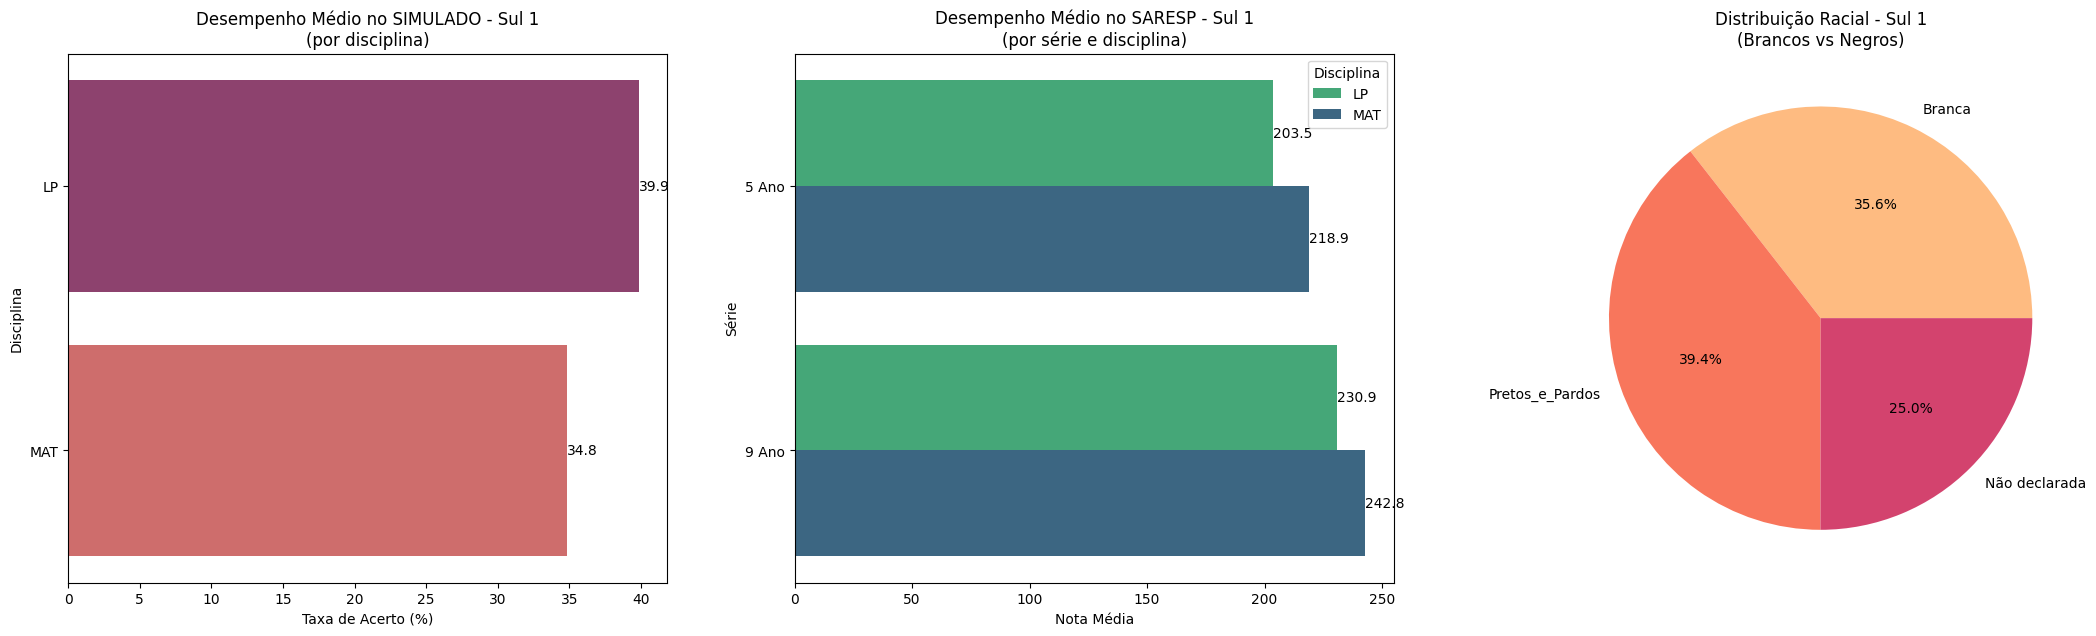

In [76]:
## ANÁLISE INTEGRADA USANDO DF_FINAL - SUL 1

# 1. CONFIGURAÇÃO INICIAL
plt.figure(figsize=(22, 7))
paleta_cores = {'SIMULADO': 'flare_r', 'SARESP': 'viridis_r', 'RAÇA': 'magma_r'}

# 2. GRÁFICO 1: DESEMPENHO NO SIMULADO (df_final_simulado)
plt.subplot(1, 3, 1)
df_simulado_sul1 = df_final_simulado[df_final_simulado['DE'].str.contains("SUL 1", case=False, na=False)]
media_simulado = df_simulado_sul1.groupby('Disciplina')['Taxa_Acerto'].mean().sort_values(ascending=False)

plt.title("Desempenho Médio no SIMULADO - Sul 1\n(por disciplina)")
grafico = grafico_barras_1(media_simulado, paleta_cores['SIMULADO'])
valor_barras(grafico, 1)
plt.xlabel('Taxa de Acerto (%)')
plt.ylabel('Disciplina')

# 3. GRÁFICO 2: DESEMPENHO NO SARESP (df_final_saresp)
plt.subplot(1, 3, 2)
df_saresp_sul1 = df_final_saresp[df_final_saresp['DE'].str.contains("SUL 1", case=False, na=False)]
media_saresp = df_saresp_sul1.groupby('SERIE_ANO')[['LP', 'MAT']].mean().stack().reset_index()
media_saresp.columns = ['Série', 'Disciplina', 'Nota Média']

plt.title("Desempenho Médio no SARESP - Sul 1\n(por série e disciplina)")
grafico = sns.barplot(data=media_saresp, y='Série', x='Nota Média', hue='Disciplina',
                      palette=paleta_cores['SARESP'])
valor_barras(grafico, 1)
plt.xlabel('Nota Média')
plt.ylabel('Série')
plt.legend(title='Disciplina')

# 4. GRÁFICO 3: DISTRIBUIÇÃO RACIAL (df_raca_Sul1eJundiai)
plt.subplot(1, 3, 3)
df_raca_sul1 = df_raca_Sul1eJundiai[df_raca_Sul1eJundiai['DE'] == 'SUL 1']
distribuicao_racial = df_raca_sul1[['Branca', 'Pretos_e_Pardos', 'Não declarada']].sum()

plt.title("Distribuição Racial - Sul 1\n(Brancos vs Negros)")
grafico_setores_1(distribuicao_racial, paleta_cores['RAÇA'])

# 5. AJUSTES FINAIS
plt.tight_layout(pad=3.0)  # Aumenta o padding entre os gráficos
plt.show()

In [96]:
# 1. Juntar Simulado e SARESP (ambos têm SERIE_ANO)
df_simulado_agg = df_final_simulado.groupby(['SERIE_ANO', 'DE', 'ESCOLA', 'Disciplina'])['Taxa_Acerto'].mean().reset_index()
df_saresp_agg = df_final_saresp.groupby(['SERIE_ANO', 'DE', 'ESCOLA'])[['LP', 'MAT']].mean().reset_index()

# Merge Simulado + SARESP
df_combined = pd.merge(
    df_simulado_agg,
    df_saresp_agg,
    on=['SERIE_ANO', 'DE', 'ESCOLA'],
    how='inner'  # Mantém apenas escolas presentes nos dois
)

# 2. Adicionar dados raciais (sem SERIE_ANO, apenas por escola)
df_final = pd.merge(
    df_combined,
    df_raca_Sul1eJundiai[['DE', 'ESCOLA', 'Média_Branca', 'Média_Pretos_e_Pardos']],
    on=['DE', 'ESCOLA'],
    how='left'  # Mantém todas as escolas do merge anterior, mesmo sem dados raciais
)

# Verificar resultado
print(df_final.head())
print("\nColunas disponíveis:", df_final.columns.tolist())

  SERIE_ANO     DE                               ESCOLA Disciplina Taxa_Acerto     LP    MAT  Média_Branca  Média_Pretos_e_Pardos
0     9 Ano  SUL 1  AMADOR E CATHARINA SAPORITO AUGUSTO         LP   61.622807  234.7  259.1     41.696113              30.918728
1     9 Ano  SUL 1  AMADOR E CATHARINA SAPORITO AUGUSTO        MAT   44.331984  234.7  259.1     41.696113              30.918728
2     9 Ano  SUL 1                    AYRES NETO DOUTOR         LP   37.707039  218.1  232.6     33.595989              33.810888
3     9 Ano  SUL 1                    AYRES NETO DOUTOR        MAT   31.796464  218.1  232.6     33.595989              33.810888
4     9 Ano  SUL 1     BENTO PEREIRA DA ROCHA PROFESSOR         LP   37.727273  222.0  235.4     31.042129              29.933481

Colunas disponíveis: ['SERIE_ANO', 'DE', 'ESCOLA', 'Disciplina', 'Taxa_Acerto', 'LP', 'MAT', 'Média_Branca', 'Média_Pretos_e_Pardos']


In [98]:
# Converter colunas para numérico, forçando valores inválidos para NaN
df_final['Média_Pretos_e_Pardos'] = pd.to_numeric(df_final['Média_Pretos_e_Pardos'], errors='coerce')
df_final['Taxa_Acerto'] = pd.to_numeric(df_final['Taxa_Acerto'], errors='coerce')

# Remover linhas com NaN (opcional)
df_final_clean = df_final.dropna(subset=['Média_Pretos_e_Pardos', 'Taxa_Acerto'])

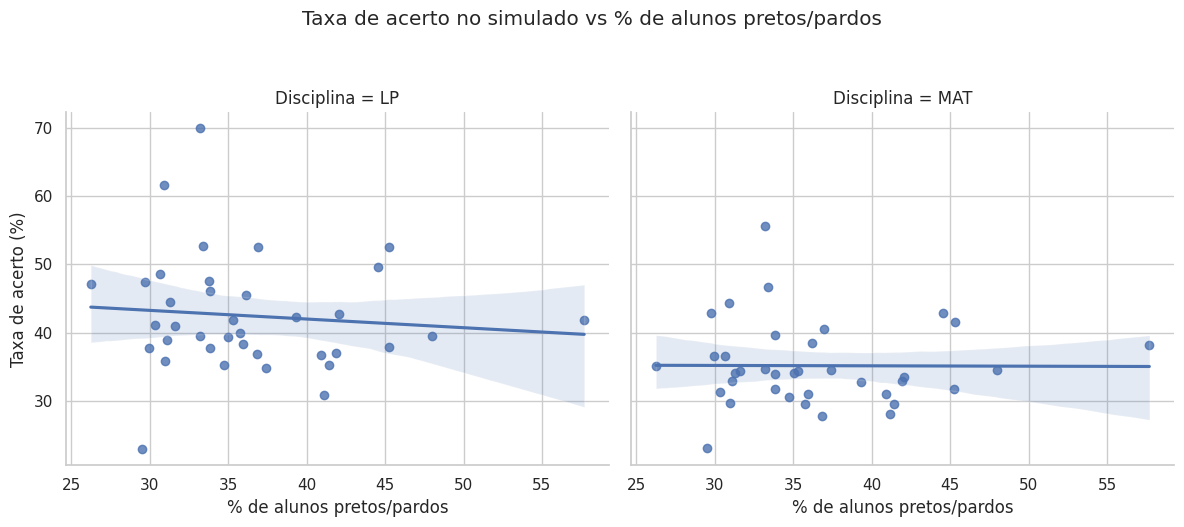

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo
sns.set(style="whitegrid")

# Gráfico de regressão
g = sns.lmplot(
    data=df_final_clean,
    x='Média_Pretos_e_Pardos',
    y='Taxa_Acerto',
    col='Disciplina',
    facet_kws={'sharey': True, 'sharex': True},
    height=5,
    aspect=1.2
)

# Ajustar título
g.fig.suptitle('Taxa de acerto no simulado vs % de alunos pretos/pardos', y=1.05)

# Ajustar eixos
g.set_axis_labels("% de alunos pretos/pardos", "Taxa de acerto (%)")

plt.tight_layout()
plt.show()